# Video Game Sale Prediction using Machine Learning

## 1. Problem Definition

> How well can we train a model that can predict the future video game sale price given its characteristic and previous examples of how much games have been sold for in different regions.
> Problem Goal: Train a model and try to achieve >= 80% confidence level

## 2. Data 

> The data is downloaded from Kaggle: https://www.kaggle.com/datasets/gregorut/videogamesales
> There is 1 main dataset:
* vgsales.csv is the data set, which contains data of games that has over 100,000 sales 
    
## 3. Evaluation
> The evaluation metric for this study has not been established

## 4. Goals
- Perform exploratory data analysis (EDA) to uncover patterns in video game sales.
- Build machine learning models to predict future sales based on the available features.
- Tune the models using hyperparameter optimization to achieve better performance.
- Evaluate the model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2.

## 5. Features
**as mentioned in https://www.kaggle.com/datasets/gregorut/videogamesales/data**
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales



In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#Store the csv into a datafram using Pandas 
df = pd.read_csv('vgsales.csv')
df.head().T

,0,1,2,3,4
Rank,1,2,3,4,5
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
Platform,Wii,NES,Wii,Wii,GB
Year,2006.0,1985.0,2008.0,2009.0,1996.0
Genre,Sports,Platform,Racing,Sports,Role-Playing
Publisher,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo
NA_Sales,41.49,29.08,15.85,15.75,11.27
EU_Sales,29.02,3.58,12.88,11.01,8.89
JP_Sales,3.77,6.81,3.79,3.28,10.22
Other_Sales,8.46,0.77,3.31,2.96,1.0


In [4]:
#check for any missing values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
(df.isnull().sum()/len(df))*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [6]:
#check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#Drop the missing years and publishers as the dataset has >100,000 entries. 
warnings.simplefilter('ignore')
df_cleaned = df.dropna(subset=['Year'])
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned = df_cleaned.dropna(subset=['Publisher'])

#Providing a visual of the missing data overall
print("Missing values after handling 'Year':")
print(df_cleaned.isnull().sum())

Missing values after handling 'Year':
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# Data Visualization

In [9]:
## Pie Chart comparing the Sale Distrubution per Region

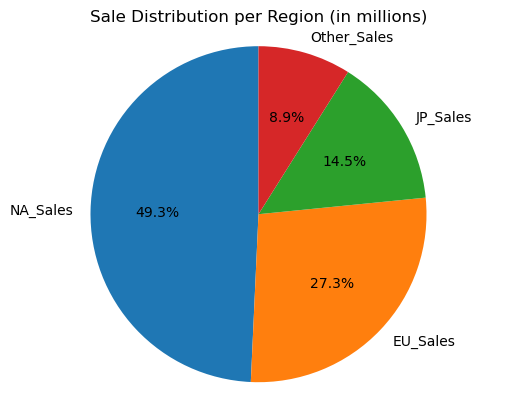

CPU times: total: 31.2 ms
Wall time: 134 ms


In [10]:
%%time
total_sales = [
    df['NA_Sales'].sum(),
    df['EU_Sales'].sum(),
    df['JP_Sales'].sum(),
    df['Other_Sales'].sum()]

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, ax = plt.subplots()
ax.pie(total_sales, labels = regions, autopct='%1.1f%%', startangle=90);
ax.axis('equal')
plt.title("Sale Distribution per Region (in millions)")
plt.show()

In [11]:
# Grouping sales by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

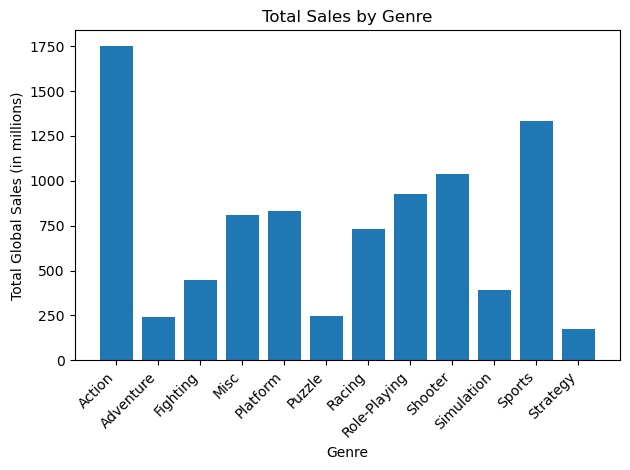

In [12]:
fig, ax = plt.subplots()
ax.bar(genre_sales['Genre'], genre_sales['Global_Sales'])
plt.title("Total Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (in millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Grouping sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

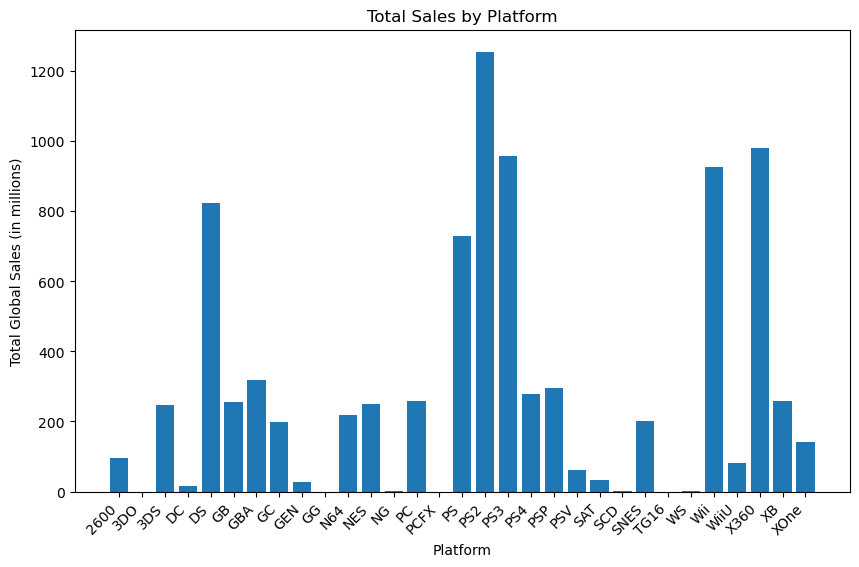

In [14]:
#Platform vs. Sales
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(platform_sales['Platform'], platform_sales['Global_Sales'])
plt.title("Total Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Global Sales (in millions)")
plt.xticks(rotation=45, ha='right')
plt.show()

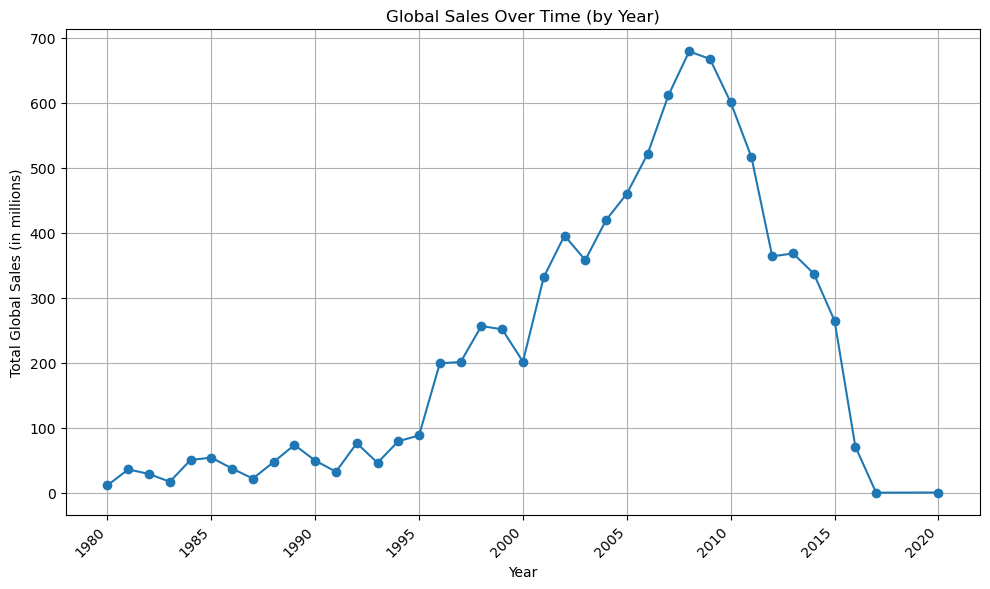

In [15]:
# Grouping sales by year
year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotting sales over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(year_sales['Year'], year_sales['Global_Sales'], marker='o')
plt.title("Global Sales Over Time (by Year)")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (in millions)")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
corr_matrix

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


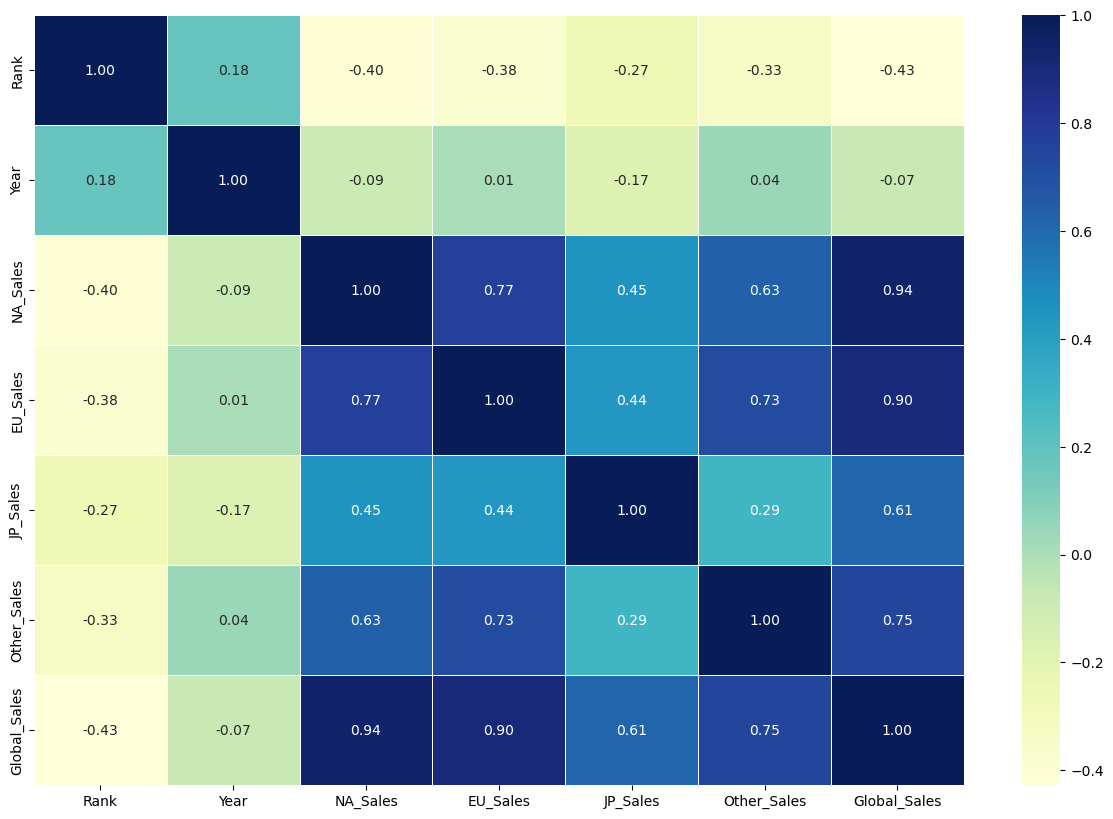

In [85]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt = '.2f',   #formating decimal places
                 cmap= 'YlGnBu');

From the correlation matrix we can infer the following:
1. Strong Correlation Between `Global_Sales` and Both `NA_Sales` and `EU_Sales`:
   
    > This suggests that those two regions are the top consumers in relation with video game sales
    Further more, `NA_Sales` and `EU_Sales` are closely tied between each squares suggesting they follow the same mainstream demand and market trends

2. Lower Correlation Between `Global_Sales` and `JP_Sales`: 
    > This suggests that sales in Japan are more independent or may have a different market demand (ie. different genres of games) as compared to the west.
    
4. Weak or No Correlation Between `Year` and `Sales`:
   > The very weak correlations between `Year` and the various sales figures suggest that release year has little to no impact on how well a game performs in terms of global or regional sales.
   > Other factors affects the games success
   
5. Negative Correlation Between `Rank` and `Global_Sales`:
   > this suggests that external factors, such as marketing efforts, game quality, content trends, or others, likely have a significant impact on a game's rank and sales performance.









In [19]:
#Top 10 games!
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [20]:
top_ten = pd.DataFrame(df.head(10))

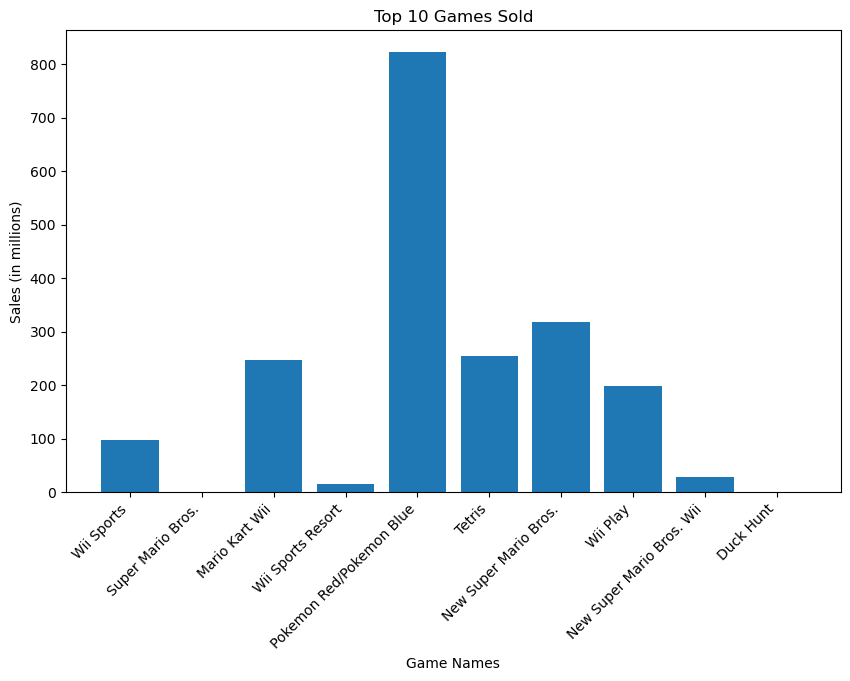

In [95]:
fig, ax = plt.subplots(figsize =(10,6))
ax.bar(top_ten['Name'], platform_sales['Global_Sales'][:10]);
plt.xlabel('Game Names')
plt.ylabel('Sales (in millions)')
plt.title('Top 10 Games Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Cleaning the data

In [23]:
# Apply the encoding function to the non-int categories
categorical_columns = ['Name', 'Platform', 'Genre', 'Publisher']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

In [24]:
df_encoded['Global_Sales'].dtype

dtype('float64')

In [25]:
df_encoded.isna().sum()

Rank                              0
Year                              0
NA_Sales                          0
EU_Sales                          0
JP_Sales                          0
                                 ..
Publisher_id Software             0
Publisher_imageepoch Inc.         0
Publisher_inXile Entertainment    0
Publisher_mixi, Inc               0
Publisher_responDESIGN            0
Length: 11947, dtype: int64

# time to prep for model

In [27]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Global_Sales', axis=1)  # Features (input data)
y = df_encoded['Global_Sales']  # Target variable (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(13032, 11946) (13032,)


In [28]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

CPU times: total: 1min 38s
Wall time: 4min 3s


RandomForestRegressor()

In [115]:
model.score(X_test, y_test)

0.8327012295219451

# Model Evaluation

In [117]:
y_preds = model.predict(X_test)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def show_scores(model):
    scores = {'Mean Absolute Error': mean_absolute_error(y_test, y_preds),
              'Mean Squared Error': mean_squared_error(y_test, y_preds),
              'Root Mean Squared Error': root_mean_squared_error(y_test, y_preds),
              'R2': r2_score(y_test, y_preds)}
    return scores
    
metric_1 = show_scores(model)
metric_1

{'Mean Absolute Error': 0.016851856397668306,
 'Mean Squared Error': 0.7156987447806072,
 'Root Mean Squared Error': 0.8459898018183241,
 'R2': 0.8327012295219451}

In [33]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {'n_estimators': np.arange(100, 1000, 50),
           'max_depth': [None, 10, 20],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', None],
           'max_samples': [None, 0.8, 0.9],
          }
#instantiate randomsearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=2,
                                                    cv = 5,
                                                    verbose=True)

#Fit the randomisedsearchcv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1h 51min 11s
Wall time: 32min 7s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt', None],
                                        'max_samples': [None, 0.8, 0.9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [111]:
#find the best params
rs_model.best_params_

{'n_estimators': 550,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_samples': 0.8,
 'max_features': None,
 'max_depth': 20}

In [109]:
#Evaluate the randomsizedsearchcv model
metric_2 = show_scores(rs_model)
metric_2

{'Mean Absolute Error': 0.016851856397668306,
 'Mean Squared Error': 0.7156987447806072,
 'Root Mean Squared Error': 0.8459898018183241,
 'R2': 0.8327012295219451}

In [36]:
%%time 

#most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=600,
                                   min_samples_leaf=5,
                                   min_samples_split=8,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

#fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 15min 45s
Wall time: 4min 25s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=600, n_jobs=-1, random_state=42)

In [107]:
ideal_model.score(X_test, y_test)

0.7812282339740365

In [105]:
def metric_comparison(metric_1, metric_2, precision = 4):
    result_dict = {f'{key} difference': round(metric_1[key] - metric_2[key], precision) for key in metric_1 if key in metric_2}
    return result_dict

metric_comparison(metric_1, metric_2)

{'Mean Absolute Error difference': 0.0,
 'Mean Squared Error difference': 0.0,
 'Root Mean Squared Error difference': 0.0,
 'R2 difference': 0.0}

As we can see, through RandomizedSearchCV with a variety of parameters to search though and with a Cross-Validation fold of 5 there is no change in terms of the model score compared with the pre-tuned model, this could indicate the algorithm itself (RandomForestRegressor) was already working optimally

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get predictions for training and test data
train_predictions = ideal_model.predict(X_train)
test_predictions = ideal_model.predict(X_test)

# Calculate performance metrics on training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate performance metrics on test data
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Display results
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

Training MAE: 0.007500481941737928
Training MSE: 0.02467165862834849
Training R2: 0.9876682052031699
Test MAE: 0.026002818827977777
Test MSE: 0.9358985597491716
Test R2: 0.7812282339740365


As we can see above, the training MSE performs much better than the test MSE (lower error score)

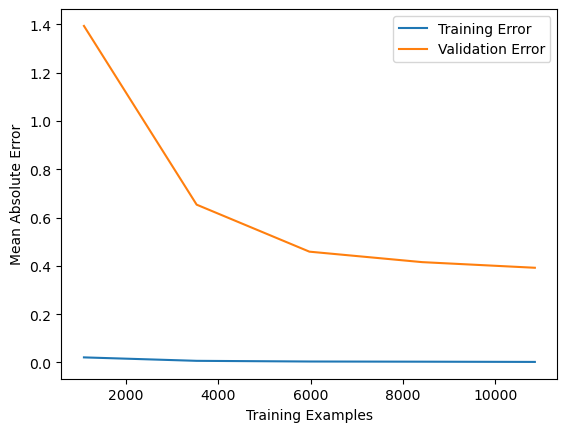

In [89]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

Signs of overfitting on a graph:
- Low Training error:
> The model performs almost perfectly on the training data (The training error line is almost linear)
- High Validation error:
> poor performance on the validation set (The test error line is erratic)
- Huge gap in between the Training and Validation error:
> A significant difference between the two curves indicates that the model is overfitted
 
Some possible steps to remedy this:
- Change the parameters to be more flexible when tuning the model:
  > Adjusting the hyperparameters to reduce the complexity of the model and its constraints
- Change the model
- Use a different CV parameter
- Identify and remove irrelevant features or categories that do not contribute significantly to the target variable:
  > features or categories that do not contribute significantly to the target variable. This can help reduce overfitting by eliminating irrelevant information
- Increase the training data size

This is just a general workflow of this dataset. The highlight of this workflow is the data visualization. 

# Conclusion:

The untuned and tuned models both produced similar metrics (MAE, MSE, RMSE, and R2), indicating that hyperparameter tuning did not lead to significant improvements in model performance. This suggests that the untuned model was already performing optimally for this dataset, and further tuning did not introduce noticeable positive benefits.

While the models performed similarly, it would be beneficial to explore other hyperparameter combinations or perhaps use a different model to see if any performance improvements can be achieved.

Additionally, increasing the size of the training dataset or applying regularization techniques might help reduce any potential overfitting.

Future work could involve comparing the model's performance on other datasets or experimenting with ensemble methods to improve prediction accuracy.